# Avito: O que é? 

# Importando libs

In [1]:
%matplotlib inline  
import numpy as np
import pandas as pd
import scipy as sp


# Carregando o dataset

In [108]:
df = pd.read_csv('train.csv.zip', compression='zip')

## Tratamento dos dados

In [109]:
# transformando descrições nulas em str vazias
df['description'] = df['description'].replace(np.nan, '', regex=True)


# trocando para que colunas com valores em russo sejam substituidas por valores de 0-N
# acho q isso vai facilitar na hora de acessar essas colunas
# ao inves de tentar pegar pelos diferentes valores de cada uma
def convert_columns_with_russian_values_to_numbers(df, cols):
    transform_dict = {}
    for col in cols:
        cats = pd.Categorical(df[col]).categories
        d = {}
        for i, cat in enumerate(cats):
            d[cat] = f'{i}'
        transform_dict[col] = d
    inverse_transform_dict = {}
    for col, d in transform_dict.items():
        inverse_transform_dict[col] = {v:k for k, v in d.items()}
        
    return df.replace(transform_dict), inverse_transform_dict
# Aplica essa função para category_name e region
df, inverse_transform_dict = convert_columns_with_russian_values_to_numbers(df, ['category_name', 'region'])

# transforma user_type e category_name em diferentes colunas com representações one-hot delas
df = pd.get_dummies(df, columns=['user_type','category_name', ])


# normalizar price?
# ...

,item_id,user_id,region,city,parent_category_name,param_1,param_2,param_3,title,description,...,category_name_42,category_name_43,category_name_44,category_name_45,category_name_46,category_name_5,category_name_6,category_name_7,category_name_8,category_name_9
0,b912c3c6a6ad,e00f8ff2eaf9,19,Екатеринбург,Личные вещи,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",...,1,0,0,0,0,0,0,0,0,0
1,2dac0150717d,39aeb48f0017,17,Самара,Для дома и дачи,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",...,0,0,0,0,0,0,0,0,0,0
2,ba83aefab5dc,91e2f88dd6e3,16,Ростов-на-Дону,Бытовая электроника,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",...,0,0,0,0,0,0,0,0,0,0
3,02996f1dd2ea,bf5cccea572d,21,Набережные Челны,Личные вещи,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,...,1,0,0,0,0,0,0,0,0,0
4,7c90be56d2ab,ef50846afc0b,4,Волгоград,Транспорт,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,...,0,0,0,0,0,0,0,0,0,0


## Sobre os dados

* title
* description
* user_type
* price
* category_name
* item_seq_number
* region
* deal_probability


Uma olhada nos dados:

In [4]:
df.head(5)

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


Agrupando pelas categorias

In [102]:
group_category = df.groupby('category_name')
group_category.count()

,item_id,user_id,region,city,parent_category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
category_name,,,,,,,,,,,,,,,,,
Автомобили,62494,62494,62494,62494,62494,62055,62055,61937,62494,62494,61287,62494,62494,62494,58949,58949,62494
Аквариум,4840,4840,4840,4840,4840,0,0,0,4840,4840,4302,4840,4840,4840,4519,4519,4840
Аудио и видео,27036,27036,27036,27036,27036,26857,0,0,27036,27036,26186,27036,27036,27036,25893,25893,27036
Билеты и путешествия,3108,3108,3108,3108,3108,3047,0,0,3108,3108,2984,3108,3108,3108,2868,2868,3108
Бытовая техника,33705,33705,33705,33705,33705,33528,31507,0,33705,33705,32810,33705,33705,33705,31852,31852,33705
Велосипеды,10638,10638,10638,10638,10638,10592,0,0,10638,10638,10335,10638,10638,10638,10427,10427,10638
Водный транспорт,2180,2180,2180,2180,2180,2175,0,0,2180,2180,2074,2180,2180,2180,1871,1871,2180
Гаражи и машиноместа,7304,7304,7304,7304,7304,7275,7275,6554,7304,7304,6392,7304,7304,7304,2750,2750,7304
Готовый бизнес,2028,2028,2028,2028,2028,2021,0,0,2028,2028,1792,2028,2028,2028,1654,1654,2028


Conferindo comportamento de items com preço 0
grande parte é proximo de 0
E alguns tmb são muito vendidos (vi que tem muitas coisas de troca, ou adoção de animal abandonado por exemplo)

(2369, 18)
(2277, 18)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f931a501588>]],
      dtype=object)

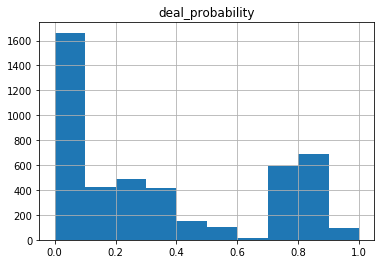

In [6]:
free_price = df[(df['price'] == 0)]
print(free_price[(free_price['deal_probability'] < 0.25)].shape)
print(free_price[(free_price['deal_probability'] >= 0.25)].shape)
free_price.hist(column='deal_probability')

# Testando montar um bag of words

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')


def convert_deal_probability_to_class(value):
    classes = [

    ]
    if value * 100 <= (100 / 3 * 1):
        return 'low'
    elif value * 100 <= (100 / 3 * 2):
        return 'average'
    else:
        return 'high'

df['deal_prob_class'] = df['deal_probability'].apply(convert_deal_probability_to_class)

def prepare_vectorizer_and_col(df, col_name):
    vectorizer = CountVectorizer(lowercase=True, stop_words=stopwords.words('russian'))
    corpus = df[col_name]
    col_vectorized = vectorizer.fit_transform(corpus)
    return col_vectorized, vectorizer

    

description_vectorized, vectorizer_description = prepare_vectorizer_and_col(df, 'description')

[nltk_data] Downloading package stopwords to /home/arruda/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
from sklearn.naive_bayes import MultinomialNB

def get_multinomial_NB(X, y):
    classifier = MultinomialNB()
    classifier.fit(X, y)
    return classifier


In [16]:
model_description_multinomial_nb = get_multinomial_NB(description_vectorized, df['deal_prob_class'])

## testando modelo LinearRegression

In [24]:
from sklearn.linear_model import LinearRegression
clf = BayesianRidge()

# clf.(description_vectorized, df['deal_probability'])
linear_regression = LinearRegression()
linear_regression.fit(description_vectorized, df['deal_probability'])
# clf.predict()


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
import pickle
def save_description_linear_regression_model(pkl_filename, model):
    with open(pkl_filename, 'wb') as f:
        pickle.dump(model, f)
def load_description_linear_regression_model(pkl_filename):
    with open(pkl_filename, 'rb') as f:
        pickle_model = pickle.load(f)
        return pickle_model

In [37]:
save_description_linear_regression_model('description_countvec_lreg_model.pkl', linear_regression)
description_countvec_lreg_model = load_description_linear_regression_model('description_countvec_lreg_model.pkl')

In [ ]:
testv = description_countvec_lreg_model.coef_ == linear_regression.coef_

### Testando o modelo em cima do proprio dataset de treino:

In [53]:
from sklearn.metrics import mean_squared_error
#Bobinho, testando em cima do proprio treino, e ainda assim ficou bem ruim
desc_countvec_lreg_predict = description_countvec_lreg_model.predict(description_vectorized)

mean_squared_error(df['deal_probability'], desc_countvec_lreg_predict)

0.0396135274399414

## Testando usando linear regression + o predict do modelo anterior

primeiro add essa predict do modelo anterior no dataset

In [57]:
df['desc_countvec_lreg_predict'] = desc_countvec_lreg_predict

Agora usar isso e 'user_type, price, category_name, item_seq_number, region' pra 
 fazer uma nova linear regression (só preciso normalizar primeiro e arrumar as colunas que são classes)

#### user_type

In [100]:
# user_types = df['user_type'].value_counts().index
# for user_type in user_types:
#     df = df.drop(f'user_type_{user_type}', 1).head()
#     df[f'user_type_{user_type}'] = np.zeros((df.shape[0], 1))
    


,item_id,user_id,region,city,parent_category_name,param_1,param_2,param_3,title,description,...,category_name_Растения,category_name_Ремонт и строительство,category_name_Собаки,category_name_Спорт и отдых,category_name_Телефоны,category_name_Товары для детей и игрушки,category_name_Товары для животных,category_name_Товары для компьютера,category_name_Фототехника,category_name_Часы и украшения
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",...,0,0,0,0,0,1,0,0,0,0
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",...,0,0,0,0,0,0,0,0,0,0
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",...,0,0,0,0,0,0,0,0,0,0
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,...,0,0,0,0,0,1,0,0,0,0
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,...,0,0,0,0,0,0,0,0,0,0


## testando modelo BayesianRidge

Precisa de uma matriz densa, e nao uma sparse.

In [43]:
# from sklearn.linear_model import BayesianRidge
# clf = BayesianRidge()
# clf.fit(description_vectorized, df['deal_probability'])
# # clf.predict()


In [57]:
# # vectorizer.transform(['Кокон']).toarray().
# print(vectorizer.vocabulary_.get('BLUESKAY'))
# corpus[corpus.str.contains("blueskay")]
# # vectorizer.get_feature_names()[100000]
# df[df['description'] == corpus[33135]]
# vectorizer.transform(None).toarray()


In [59]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model_gaussian_description = gnb.fit(X, ).predict(iris.data)
